In [1]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

In [2]:
#useful functions

def plotUMAP (fileName,color,title,column):
    plt.scatter(umaps_regressed['UMAP_1'],umaps_regressed['UMAP_2'],c=df_res[column],s=0.2)
    plt.title(title,fontsize=15)
    plt.xlabel("UMAP_1",size=12)
    plt.ylabel("UMAP_2",size=12)
    doublet_patch = mpatches.Patch(color= color, label='Doublet')
    singlet_patch = mpatches.Patch(color='lightgrey', label='Singlet')
    plt.legend(handles=[doublet_patch, singlet_patch])
    plt.savefig(fileName,dpi=300)

In [3]:
#get ground truth
doubletsScore = pd.read_csv("/data/Alex/DoubletExperimentsData/DemuxletData/demuxlet_PBMCs/demuxlet_calls.tsv",sep="\t",index_col=0)

In [4]:
#UMAP coordinates from Seurat
umaps_regressed = pd.read_csv("/data/Alex/DoubletExperimentsData/DemuxletData/demuxlet_PBMCs/UMAP_embed_nCountsregressed.csv",index_col=0)

In [5]:
#subset only doublets and singlets; not including AMB in analysis
doubletsScore = doubletsScore[doubletsScore['Call'].isin(['DBL','SNG'])]
print (doubletsScore.shape)

(14595, 2)


In [6]:
#DoubletFinder
df_res = pd.read_csv("metaDataDemuxletSeveralDFrates.csv",header=0,index_col=0)
df_res.index = [a.replace(".","-") for a in df_res.index]

In [7]:
umaps_regressed.index = [a.replace(".","-") for a in umaps_regressed.index]

In [8]:
df_res = df_res.loc[doubletsScore.index, :]

In [9]:
umaps_regressed = umaps_regressed.loc[doubletsScore.index, :]

In [10]:
#ground truth plots
colorDict = {'DBL':'black',"SNG":'lightgrey'}

colors = [colorDict[x] for x in doubletsScore['Call'].values]

df_res['ground_truth_col'] = colors

In [11]:
df_res.head()

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,pANN_0.25_0.005_1170,DF.classifications_0.25_0.005_1170,pANN_0.25_0.005_1593,DF.classifications_0.25_0.005_1593,pANN_0.25_0.005_1681,DF.classifications_0.25_0.005_1681,pANN_0.25_0.005_1827,DF.classifications_0.25_0.005_1827,ground_truth_col
Barcode,,,,,,,,,,,,,,
AAACATACAATGCC-1,SeuratProject,2191,852,5,5,0.628866,Doublet,0.618557,Doublet,0.618557,Doublet,0.618557,Doublet,black
AAACATACATTTCC-1,SeuratProject,3018,878,4,4,0.082474,Singlet,0.051546,Singlet,0.051546,Singlet,0.051546,Singlet,lightgrey
AAACATACCAGAAA-1,SeuratProject,2481,713,1,1,0.020619,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet,lightgrey
AAACATACCAGCTA-1,SeuratProject,3157,950,1,1,0.278351,Singlet,0.298969,Singlet,0.298969,Singlet,0.298969,Singlet,black
AAACATACCATGCA-1,SeuratProject,703,337,6,6,0.000000,Singlet,0.010309,Singlet,0.010309,Singlet,0.010309,Singlet,lightgrey


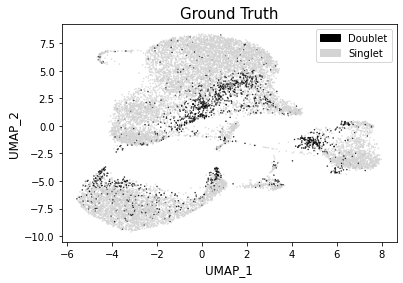

In [12]:
plotUMAP("Demuxlet_ground_truth.png","black","Ground Truth","ground_truth_col")

In [13]:
df_res['ground_truth'] = doubletsScore['Call'].values


In [14]:
df_res['DF col'] = 'lightgrey'
df_res.loc[(df_res['ground_truth']=="DBL")& (df_res['DF.classifications_0.25_0.005_1827']=="Doublet"),
           ['DF col']]="darkgreen"

In [15]:
df_res.loc[(df_res['ground_truth']=="SNG")&(df_res['DF.classifications_0.25_0.005_1827']=="Doublet")]

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,pANN_0.25_0.005_1170,DF.classifications_0.25_0.005_1170,pANN_0.25_0.005_1593,DF.classifications_0.25_0.005_1593,pANN_0.25_0.005_1681,DF.classifications_0.25_0.005_1681,pANN_0.25_0.005_1827,DF.classifications_0.25_0.005_1827,ground_truth_col,ground_truth,DF col
Barcode,,,,,,,,,,,,,,,,
AAACATTGAGTGTC-1,SeuratProject,2157,882,3,3,0.690722,Doublet,0.731959,Doublet,0.731959,Doublet,0.731959,Doublet,lightgrey,SNG,lightgrey
AAAGCAGAGTTTCT-1,SeuratProject,3010,877,2,2,0.659794,Doublet,0.659794,Doublet,0.659794,Doublet,0.659794,Doublet,lightgrey,SNG,lightgrey
AAAGGCCTGAGGAC-1,SeuratProject,1952,667,0,0,0.505155,Singlet,0.484536,Singlet,0.484536,Doublet,0.484536,Doublet,lightgrey,SNG,lightgrey
AAAGTTTGCTTCTA-1,SeuratProject,4259,1464,9,9,0.608247,Doublet,0.587629,Doublet,0.587629,Doublet,0.587629,Doublet,lightgrey,SNG,lightgrey
AAAGTTTGTGTGGT-1,SeuratProject,3519,995,0,0,0.721649,Doublet,0.762887,Doublet,0.762887,Doublet,0.762887,Doublet,lightgrey,SNG,lightgrey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTCGCCTT-1,SeuratProject,2684,938,3,3,0.783505,Doublet,0.773196,Doublet,0.773196,Doublet,0.773196,Doublet,lightgrey,SNG,lightgrey
TTGTCATGAGATGA-1,SeuratProject,1434,815,6,6,0.567010,Singlet,0.546392,Doublet,0.546392,Doublet,0.546392,Doublet,lightgrey,SNG,lightgrey
TTGTCATGGTCACA-1,SeuratProject,1712,702,0,0,0.608247,Doublet,0.608247,Doublet,0.608247,Doublet,0.608247,Doublet,lightgrey,SNG,lightgrey


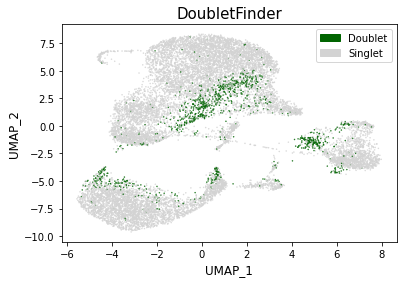

In [16]:
plotUMAP("DoubletFinder_demuxlet.png","darkgreen","DoubletFinder","DF col")

In [27]:
DD_score = pd.read_csv("Final_doublets_exp_Demuxlet_PBMC.txt",sep="\t")

In [28]:
DD_score = DD_score.T
df_res['DD_score'] = "Singlet"

In [31]:
DD_score = DD_score.drop('og_processed_data[, 1]',axis=0)

In [32]:
DD_score.index = [a.replace(".","-") for a in DD_score.index]

In [35]:
DD_score.index

Index(['AAACATACTGCTGA-1', 'AAACATACTGGTCA-1', 'AAACATTGGAAAGT-1',
       'AAACCGTGAGCCAT-1', 'AAACCGTGCATTTC-1', 'AAACGCACCAACCA-1',
       'AAACGCTGCAGTTG-1', 'AAACGCTGGGTTTG-1', 'AAACGCTGTTCCAT-1',
       'AAACGGCTAGTACC-1',
       ...
       'CATGTTACCCTTTA-1', 'CCTGGACTAGCTCA-1', 'CGCAGGTGGGTCTA-1',
       'CTTCATGACTCCCA-1', 'GCATTGGAGTTGGT-1', 'GTCCAAGACCCAAA-1',
       'GTTATAGACTATTC-1', 'TAAATCGAGTCGAT-1', 'TCGCCATGCAACTG-1',
       'TGTGAGTGTTATCC-1'],
      dtype='object', length=6946)

In [37]:
df_res.loc[(df_res.index.isin(DD_score.index[1:])),['DD_score']] = 'Doublet'

In [38]:
df_res['DD col'] = 'lightgrey'
df_res.loc[(df_res['ground_truth']=="DBL")& (df_res['DD_score']=="Doublet"),['DD col']]="red"

In [39]:
df_res.loc[(df_res['ground_truth']=="DBL")& (df_res['DD_score']=="Doublet")]

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.4,seurat_clusters,pANN_0.25_0.005_1170,DF.classifications_0.25_0.005_1170,pANN_0.25_0.005_1593,DF.classifications_0.25_0.005_1593,pANN_0.25_0.005_1681,DF.classifications_0.25_0.005_1681,pANN_0.25_0.005_1827,DF.classifications_0.25_0.005_1827,ground_truth_col,ground_truth,DF col,DD_score,DD col
Barcode,,,,,,,,,,,,,,,,,,
AAACATACAATGCC-1,SeuratProject,2191,852,5,5,0.628866,Doublet,0.618557,Doublet,0.618557,Doublet,0.618557,Doublet,black,DBL,darkgreen,Doublet,red
AAACATACCAGCTA-1,SeuratProject,3157,950,1,1,0.278351,Singlet,0.298969,Singlet,0.298969,Singlet,0.298969,Singlet,black,DBL,lightgrey,Doublet,red
AAACATTGGAAAGT-1,SeuratProject,4893,1320,0,0,0.670103,Doublet,0.670103,Doublet,0.670103,Doublet,0.670103,Doublet,black,DBL,darkgreen,Doublet,red
AAACATTGGCGATT-1,SeuratProject,2237,863,5,5,0.680412,Doublet,0.701031,Doublet,0.701031,Doublet,0.701031,Doublet,black,DBL,darkgreen,Doublet,red
AAAGACGAGACGGA-1,SeuratProject,1909,664,1,1,0.649485,Doublet,0.608247,Doublet,0.608247,Doublet,0.608247,Doublet,black,DBL,darkgreen,Doublet,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCACGATGATGC-1,SeuratProject,6867,1758,5,5,0.773196,Doublet,0.773196,Doublet,0.773196,Doublet,0.773196,Doublet,black,DBL,darkgreen,Doublet,red
TTTCAGTGCTGTCC-1,SeuratProject,1867,722,0,0,0.701031,Doublet,0.711340,Doublet,0.711340,Doublet,0.711340,Doublet,black,DBL,darkgreen,Doublet,red
TTTCCAGATCCTAT-1,SeuratProject,2420,788,0,0,0.463918,Singlet,0.474227,Singlet,0.474227,Singlet,0.474227,Doublet,black,DBL,darkgreen,Doublet,red


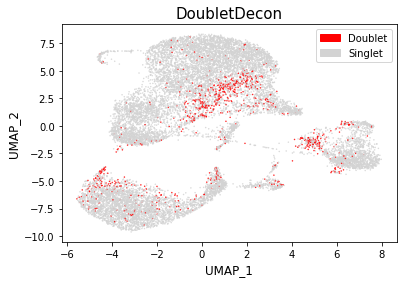

In [40]:
plotUMAP("DoubletDecon_demuxlet.png","red","DoubletDecon","DD col")